In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, OneHotEncoder
# Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score, log_loss, mean_squared_log_error
#Classification Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Loading the Train Data

In [3]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking Duplicate Values

df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# EDA

In [7]:
# Checking Missing values in Train
for feature in df.columns:
    if df[feature].isna().sum() > 0:
        print(feature,' has missing values ', df[feature].isna().sum()/df.shape[0]*100)

LotFrontage  has missing values  17.73972602739726
Alley  has missing values  93.76712328767123
MasVnrType  has missing values  59.726027397260275
MasVnrArea  has missing values  0.547945205479452
BsmtQual  has missing values  2.5342465753424657
BsmtCond  has missing values  2.5342465753424657
BsmtExposure  has missing values  2.6027397260273974
BsmtFinType1  has missing values  2.5342465753424657
BsmtFinType2  has missing values  2.6027397260273974
Electrical  has missing values  0.0684931506849315
FireplaceQu  has missing values  47.26027397260274
GarageType  has missing values  5.5479452054794525
GarageYrBlt  has missing values  5.5479452054794525
GarageFinish  has missing values  5.5479452054794525
GarageQual  has missing values  5.5479452054794525
GarageCond  has missing values  5.5479452054794525
PoolQC  has missing values  99.52054794520548
Fence  has missing values  80.75342465753424
MiscFeature  has missing values  96.30136986301369


In [8]:
# Checking Missing values in Test
for feature in test.columns:
    if test[feature].isna().sum() > 0:
        print(feature,' has missing values ', test[feature].isna().sum()/test.shape[0]*100)

MSZoning  has missing values  0.2741603838245374
LotFrontage  has missing values  15.558601782042494
Alley  has missing values  92.66620973269363
Utilities  has missing values  0.1370801919122687
Exterior1st  has missing values  0.06854009595613435
Exterior2nd  has missing values  0.06854009595613435
MasVnrType  has missing values  61.27484578478409
MasVnrArea  has missing values  1.0281014393420151
BsmtQual  has missing values  3.015764222069911
BsmtCond  has missing values  3.0843043180260454
BsmtExposure  has missing values  3.015764222069911
BsmtFinType1  has missing values  2.878684030157642
BsmtFinSF1  has missing values  0.06854009595613435
BsmtFinType2  has missing values  2.878684030157642
BsmtFinSF2  has missing values  0.06854009595613435
BsmtUnfSF  has missing values  0.06854009595613435
TotalBsmtSF  has missing values  0.06854009595613435
BsmtFullBath  has missing values  0.1370801919122687
BsmtHalfBath  has missing values  0.1370801919122687
KitchenQual  has missing value

In [9]:
print("Train Shape ", df.shape)
print("Test Shape ", test.shape)

Train Shape  (1460, 81)
Test Shape  (1459, 80)


# Concatenate train and test for missing value

In [10]:
train = df.copy()
target = df['SalePrice']
test_ids = test['Id']
df = df.drop(['Id', 'SalePrice'], axis=1)
test = test.drop(['Id'], axis=1)

df1 = pd.concat([df, test], axis=0).reset_index(drop=True)
df1.shape

(2919, 79)

In [11]:
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,

In [12]:
# Checking Missing values in Test + Train
for feature in df1.columns:
    if df1[feature].isna().sum() > 0:
        print(feature,' has missing values ', df1[feature].isna().sum()/df1.shape[0]*100)

MSZoning  has missing values  0.1370332305584104
LotFrontage  has missing values  16.649537512846866
Alley  has missing values  93.21685508735868
Utilities  has missing values  0.0685166152792052
Exterior1st  has missing values  0.0342583076396026
Exterior2nd  has missing values  0.0342583076396026
MasVnrType  has missing values  60.500171291538194
MasVnrArea  has missing values  0.7879410757108599
BsmtQual  has missing values  2.774922918807811
BsmtCond  has missing values  2.8091812264474134
BsmtExposure  has missing values  2.8091812264474134
BsmtFinType1  has missing values  2.7064063035286057
BsmtFinSF1  has missing values  0.0342583076396026
BsmtFinType2  has missing values  2.7406646111682083
BsmtFinSF2  has missing values  0.0342583076396026
BsmtUnfSF  has missing values  0.0342583076396026
TotalBsmtSF  has missing values  0.0342583076396026
Electrical  has missing values  0.0342583076396026
BsmtFullBath  has missing values  0.0685166152792052
BsmtHalfBath  has missing values  

# Cleaning

In [13]:
# Ensure Proper Data Type
df1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [14]:
df2 = df1.copy()
df2['MSSubClass'] = df2['MSSubClass'].astype(str)

In [15]:
df2.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006


## Fill Categorical Missing Values

In [16]:
df2.select_dtypes('object').loc[:, df2.isna().sum() > 0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [17]:
# Impute with constant value
# Checking each categorical feature whether any constant value is there for missing.
# If nothing mentioned for missing, we will use mode()
for feature in ['Alley',
                'BsmtQual',
                'BsmtCond', 
                'BsmtExposure', 
                'BsmtFinType1',
                'BsmtFinType2',
                'FireplaceQu', 
                'GarageType', 
                'GarageFinish', 
                'GarageQual', 
                'GarageCond',
                'PoolQC',
                'Fence',
                'MiscFeature']:
    df2[feature] =  df2[feature].fillna('None')

# Impute with column mode
for feature in ['MSZoning',
                'Utilities',
                'Exterior1st', 
                'Exterior2nd',
                'MasVnrType',
                'Electrical',
                'KitchenQual', 
                'Functional',
                'SaleType']:
    df2[feature] =  df2[feature].fillna(df2[feature].mode()[0])

In [18]:
df2.select_dtypes('object').loc[:, df2.isna().sum() > 0]

""
0
1
2
3
4
...
2914
2915
2916
2917


In [19]:
df2.select_dtypes(np.number).loc[:, df2.isna().sum() > 0]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,NaN,0.0,0.0
2915,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0
2916,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0
2917,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,NaN,0.0,0.0


# Impute Numerical Columns

In [20]:
df2.select_dtypes(np.number).loc[:, df2.isna().sum() > 0].columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [21]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = [feature for feature in numeric_df.columns if numeric_df[feature].isna().sum() == 0]
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn =KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [22]:
for column in ['LotFrontage', 
               'MasVnrArea', 
               'BsmtFinSF1', 
               'BsmtFinSF2', 
               'BsmtUnfSF',
               'TotalBsmtSF', 
               'BsmtFullBath', 
               'BsmtHalfBath', 
               'GarageYrBlt',
               'GarageCars', 
               'GarageArea']:
    df2 = knn_impute(df2, column)
    

In [23]:
df2.select_dtypes(np.number).loc[:, df2.isna().sum() > 0].columns

Index([], dtype='object')

# Feature Engineering

In [87]:
df2["SqFtPerRoom"] = df2["GrLivArea"] / (df2["TotRmsAbvGrd"] +
                                                       df2["FullBath"] +
                                                       df2["HalfBath"] +
                                                       df2["KitchenAbvGr"])

df2['Total_Home_Quality'] = df2['OverallQual'] + df2['OverallCond']

df2['Total_Bathrooms'] = (df2['FullBath'] + (0.5 * df2['HalfBath']) +
                               df2['BsmtFullBath'] + (0.5 * df2['BsmtHalfBath']))

df2["HighQualSF"] = df2["1stFlrSF"] + df2["2ndFlrSF"]

In [88]:
df22=df2.copy()

# Feature Transformations

In [89]:
# Log Transform
df2.select_dtypes(np.number).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SqFtPerRoom', 'Total_Home_Quality',
       'Total_Bathrooms', 'HighQualSF'],
      dtype='object')

In [90]:
import scipy
scipy.stats.skew(df2['LotFrontage'])

-0.9294678853091626

In [91]:
skew_df = pd.DataFrame(df2.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda x: scipy.stats.skew(df2[x]))

In [92]:
skew_df.sort_values(by='Skew', ascending=False, inplace=True)

In [93]:
skew_df

,Feature,Skew
31,PoolArea,14.998335
29,3SsnPorch,8.825256
13,LowQualFinSF,8.557690
32,MiscVal,5.213984
16,BsmtHalfBath,3.774762
20,KitchenAbvGr,3.520351
30,ScreenPorch,2.945905
8,BsmtFinSF2,2.458996
28,EnclosedPorch,1.961081
18,HalfBath,0.580692


In [94]:
skew_df[:25]['Feature'].values

array(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'KitchenAbvGr', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch',
       'HalfBath', 'MasVnrArea', 'BsmtFullBath', 'SqFtPerRoom',
       'Total_Bathrooms', 'BedroomAbvGr', 'HighQualSF', '2ndFlrSF',
       'GarageArea', 'Fireplaces', 'OverallQual', 'MoSold', 'FullBath',
       'WoodDeckSF', 'YrSold', '1stFlrSF'], dtype=object)

In [95]:
np.log(0.00001)

-11.512925464970229

In [96]:
for col in skew_df[:25]['Feature'].values:
    df2[col] = np.log1p(df2[col])

In [97]:
df2[skew_df[:25]['Feature'].values]

,PoolArea,3SsnPorch,LowQualFinSF,MiscVal,BsmtHalfBath,KitchenAbvGr,ScreenPorch,BsmtFinSF2,EnclosedPorch,HalfBath,...,HighQualSF,2ndFlrSF,GarageArea,Fireplaces,OverallQual,MoSold,FullBath,WoodDeckSF,YrSold,1stFlrSF
0,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,0.000000,0.526589,...,2.674462,2.047835,6.308098,0.000000,2.079442,1.098612,1.098612,0.000000,7.605392,2.048136
1,0.0,0.0,0.0,0.00000,0.526589,0.526589,0.0,0.0,0.000000,0.000000,...,2.096943,0.000000,6.133398,0.526589,1.945910,1.791759,1.098612,1.902174,7.604894,2.096943
2,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,0.000000,0.526589,...,2.680371,2.049631,6.411818,0.526589,2.079442,2.302585,1.098612,0.000000,7.605392,2.057383
3,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,1.888504,0.000000,...,2.674037,2.032004,6.466145,0.526589,2.079442,1.098612,0.693147,0.000000,7.604396,2.062933
4,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,0.000000,0.526589,...,2.708342,2.074473,6.729824,0.526589,2.197225,2.564949,1.098612,1.834610,7.605392,2.084931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,0.000000,0.526589,...,2.610724,1.988484,0.000000,0.000000,1.609438,1.945910,0.693147,0.000000,7.604396,1.988484
2915,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,0.000000,0.526589,...,2.610724,1.988484,5.659482,0.000000,1.609438,1.609438,0.693147,0.000000,7.604396,1.988484
2916,0.0,0.0,0.0,0.00000,0.000000,0.526589,0.0,0.0,0.000000,0.000000,...,2.093184,0.000000,6.357842,0.526589,1.791759,2.302585,0.693147,1.968973,7.604396,2.093184
2917,0.0,0.0,0.0,2.02188,0.526589,0.526589,0.0,0.0,0.000000,0.000000,...,2.064116,0.000000,0.000000,0.000000,1.791759,2.079442,0.693147,1.685370,7.604396,2.064116


In [98]:
df2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.00000,1.098612,7.605392,WD,Normal,0.847309,8.791759,1.396176,2.674462
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0.00000,1.791759,7.604894,WD,Normal,0.931918,8.197225,1.207937,2.096943
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0.00000,2.302585,7.605392,WD,Normal,0.877281,8.791759,1.396176,2.680371
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0.00000,1.098612,7.604396,WD,Abnorml,1.090071,8.791759,0.990710,2.674037
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0.00000,2.564949,7.605392,WD,Normal,0.855594,9.791759,1.396176,2.708342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.00000,1.945910,7.604396,WD,Normal,0.983810,6.079442,0.852956,2.610724
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.00000,1.609438,7.604396,WD,Abnorml,0.961279,5.791759,0.852956,2.610724
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.00000,2.302585,7.604396,WD,Abnorml,1.059467,7.079442,0.990710,2.093184
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,2.02188,2.079442,7.604396,WD,Normal,1.061305,6.791759,0.852956,2.064116


In [99]:
df3 = df2.copy()

# Encode Categorical

In [100]:
df3 = pd.get_dummies(df3)

In [101]:
df3

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,2.079442,1.791759,2003,2003,1.837880,6.561031,0.0,5.017280,...,False,False,False,True,False,False,False,False,True,False
1,4.394449,9.169623,1.945910,2.197225,1976,1976,0.000000,6.886532,0.0,5.652489,...,False,False,False,True,False,False,False,False,True,False
2,4.234107,9.328212,2.079442,1.791759,2001,2002,1.807264,6.188264,0.0,6.075346,...,False,False,False,True,False,False,False,False,True,False
3,4.110874,9.164401,2.079442,1.791759,1915,1970,0.000000,5.379897,0.0,6.293419,...,False,False,False,True,True,False,False,False,False,False
4,4.442651,9.565284,2.197225,1.791759,2000,2000,1.925822,6.486161,0.0,6.196444,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,1.609438,2.079442,1970,1970,0.000000,0.000000,0.0,6.304449,...,False,False,False,True,False,False,False,False,True,False
2915,3.091042,7.546974,1.609438,1.791759,1970,1970,0.000000,5.533389,0.0,5.686975,...,False,False,False,True,True,False,False,False,False,False
2916,5.081404,9.903538,1.791759,2.079442,1960,1996,0.000000,7.110696,0.0,0.000000,...,False,False,False,True,True,False,False,False,False,False
2917,4.143135,9.253591,1.791759,1.791759,1992,1992,0.000000,5.823046,0.0,6.356108,...,False,False,False,True,False,False,False,False,True,False


In [102]:
df3.shape

(2919, 320)

In [103]:
df4 = df3.copy()

# Scaling

In [104]:
scaler = StandardScaler()
scaler.fit(df4)

df4 = pd.DataFrame(scaler.transform(df4),index=df4.index,columns=df4.columns)

In [105]:
df4

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.682938,-0.435439,1.046258,0.896833,1.230508,0.783229,-0.366734,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,0.038652,1.906370,0.154764,-0.395604,-0.817807,0.892444,-0.366734,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.682938,-0.435439,0.980221,0.848965,1.196387,0.658154,-0.366734,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.682938,-0.435439,-1.859351,-0.682812,-0.817807,0.386923,-0.366734,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.251239,-0.435439,0.947203,0.753229,1.328520,0.758108,-0.366734,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.584820,1.226101,-0.043346,-0.682812,-0.817807,-1.418196,-0.366734,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.584820,-0.435439,-0.043346,-0.682812,-0.817807,0.438424,-0.366734,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.705122,1.226101,-0.373528,0.561757,-0.817807,0.967658,-0.366734,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.705122,-0.435439,0.683057,0.370284,-0.817807,0.535612,-0.366734,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


# Target Transformation

<Axes: >

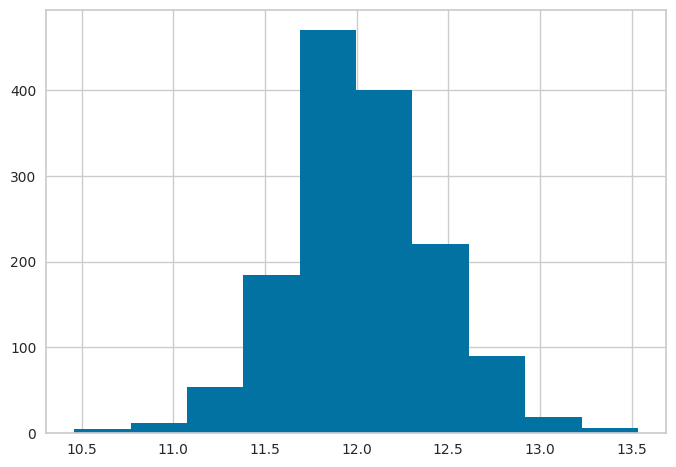

In [106]:
np.log(target).hist()

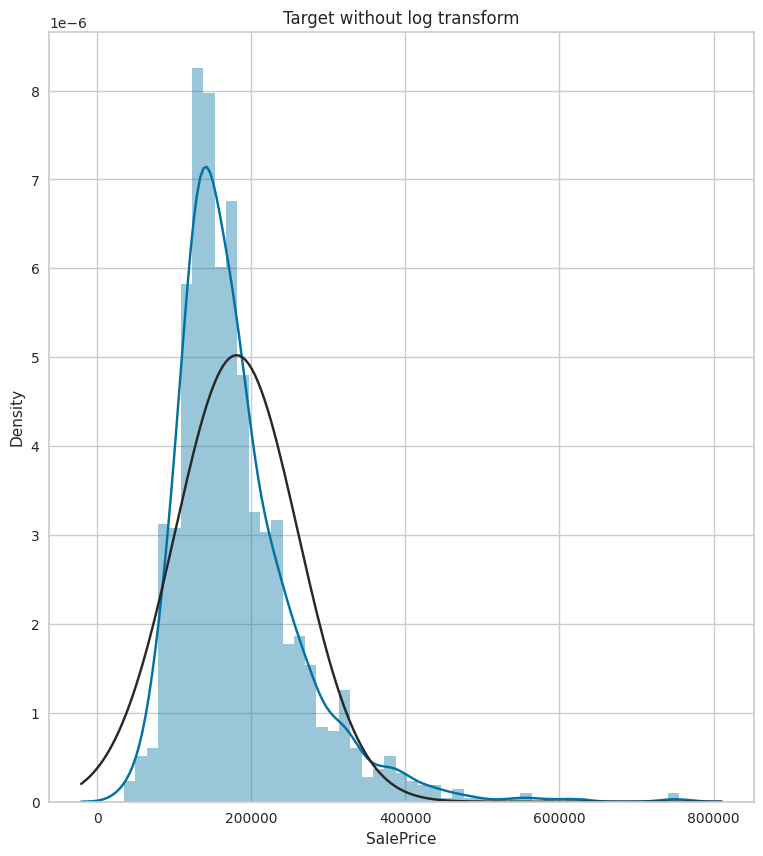

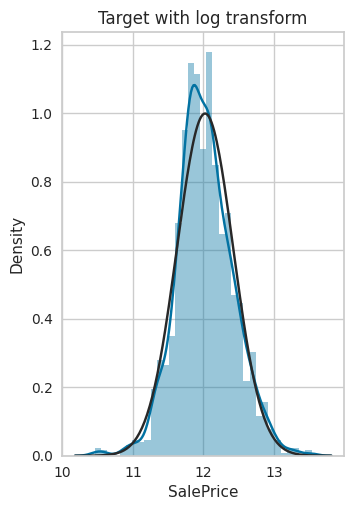

In [107]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Target without log transform")
plt.show()

plt.subplot(1,2,2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title("Target with log transform")
plt.show()

In [108]:
log_target = np.log(target)

In [109]:
# To go back to actual value do np.exp(log_target)

# Model Selection

In [110]:
!pip install -q pycaret

In [111]:
from pycaret.regression import setup, compare_models

In [112]:
# Splitting the data

train.index.max()

#X_train, X_test, y_train, y_test = train_test_split()

1459

In [113]:
df4.loc[:1459]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.682938,-0.435439,1.046258,0.896833,1.230508,0.783229,-0.366734,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,0.038652,1.906370,0.154764,-0.395604,-0.817807,0.892444,-0.366734,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.682938,-0.435439,0.980221,0.848965,1.196387,0.658154,-0.366734,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.682938,-0.435439,-1.859351,-0.682812,-0.817807,0.386923,-0.366734,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.251239,-0.435439,0.947203,0.753229,1.328520,0.758108,-0.366734,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,0.038652,-0.435439,0.914184,0.753229,-0.817807,-1.418196,-0.366734,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,0.038652,0.454875,0.220801,0.178812,1.138918,0.820898,2.567250,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.682938,2.514892,-1.000876,1.040437,-0.817807,0.467619,-0.366734,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.705122,0.454875,-0.703711,0.561757,-0.817807,-0.105594,2.994477,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [114]:
df4.index.max()

2918

In [115]:
df4.loc[1460:2918]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,0.536077,0.521437,-0.705122,0.454875,-0.340510,-1.113625,-0.817807,0.645518,2.534162,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1461,0.572040,0.923625,0.038652,0.454875,-0.439565,-1.257229,1.120248,0.873044,-0.366734,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1462,0.310504,0.862607,-0.705122,-0.435439,0.848148,0.657493,-0.817807,0.821322,-0.366734,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1463,0.462798,0.222291,0.038652,0.454875,0.881166,0.657493,0.739553,0.729841,-0.366734,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1464,-1.252596,-1.130892,1.251239,-0.435439,0.683057,0.370284,-0.817807,0.452704,-0.366734,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.584820,1.226101,-0.043346,-0.682812,-0.817807,-1.418196,-0.366734,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.584820,-0.435439,-0.043346,-0.682812,-0.817807,0.438424,-0.366734,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.705122,1.226101,-0.373528,0.561757,-0.817807,0.967658,-0.366734,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.705122,-0.435439,0.683057,0.370284,-0.817807,0.535612,-0.366734,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [116]:
train_final = df4.loc[:train.index.max()].copy()
test_final = df4.loc[train.index.max()+1:].reset_index().copy()

In [117]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.682938,-0.435439,1.046258,0.896833,1.230508,0.783229,-0.366734,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,0.038652,1.906370,0.154764,-0.395604,-0.817807,0.892444,-0.366734,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.682938,-0.435439,0.980221,0.848965,1.196387,0.658154,-0.366734,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.682938,-0.435439,-1.859351,-0.682812,-0.817807,0.386923,-0.366734,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.251239,-0.435439,0.947203,0.753229,1.328520,0.758108,-0.366734,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,0.038652,-0.435439,0.914184,0.753229,-0.817807,-1.418196,-0.366734,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,0.038652,0.454875,0.220801,0.178812,1.138918,0.820898,2.567250,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.682938,2.514892,-1.000876,1.040437,-0.817807,0.467619,-0.366734,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.705122,0.454875,-0.703711,0.561757,-0.817807,-0.105594,2.994477,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [118]:
test_final

,index,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1460,0.536077,0.521437,-0.705122,0.454875,-0.340510,-1.113625,-0.817807,0.645518,2.534162,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,1461,0.572040,0.923625,0.038652,0.454875,-0.439565,-1.257229,1.120248,0.873044,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,1462,0.310504,0.862607,-0.705122,-0.435439,0.848148,0.657493,-0.817807,0.821322,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,1463,0.462798,0.222291,0.038652,0.454875,0.881166,0.657493,0.739553,0.729841,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,1464,-1.252596,-1.130892,1.251239,-0.435439,0.683057,0.370284,-0.817807,0.452704,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2914,-3.284214,-2.993401,-1.584820,1.226101,-0.043346,-0.682812,-0.817807,-1.418196,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1455,2915,-3.284214,-3.036401,-1.584820,-0.435439,-0.043346,-0.682812,-0.817807,0.438424,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1456,2916,2.549545,1.586172,-0.705122,1.226101,-0.373528,0.561757,-0.817807,0.967658,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1457,2917,-0.200527,0.311255,-0.705122,-0.435439,0.683057,0.370284,-0.817807,0.535612,-0.366734,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [119]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [120]:
# Model Selection

_ = setup(data=pd.concat([train_final, log_target], axis=1), target='SalePrice')

,Description,Value
0,Session id,5104
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 321)"
4,Transformed data shape,"(1460, 321)"
5,Transformed train set shape,"(1021, 321)"
6,Transformed test set shape,"(439, 321)"
7,Numeric features,320
8,Preprocess,True
9,Imputation type,simple


In [121]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0826,0.0154,0.1228,0.9051,0.0095,0.0069,4.3980
gbr,Gradient Boosting Regressor,0.0892,0.0165,0.1275,0.8992,0.0099,0.0075,1.0660
lightgbm,Light Gradient Boosting Machine,0.0925,0.0180,0.1332,0.8894,0.0103,0.0077,0.3700
br,Bayesian Ridge,0.0893,0.0201,0.1396,0.8755,0.0108,0.0075,0.4720
omp,Orthogonal Matching Pursuit,0.0921,0.0204,0.1397,0.8722,0.0108,0.0077,0.2560
et,Extra Trees Regressor,0.0998,0.0212,0.1448,0.8701,0.0113,0.0084,3.2040
xgboost,Extreme Gradient Boosting,0.1023,0.0212,0.1445,0.8697,0.0112,0.0086,0.9110
rf,Random Forest Regressor,0.1002,0.0212,0.1443,0.8692,0.0112,0.0084,3.0940
ridge,Ridge Regression,0.0955,0.0241,0.1530,0.8505,0.0119,0.0080,0.3400
ada,AdaBoost Regressor,0.1264,0.0284,0.1674,0.8264,0.0130,0.0106,0.6060


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [122]:
!pip install -q catboost

catboost	CatBoost Regressor

br	Bayesian Ridge

gbr	Gradient Boosting Regressor

omp	Orthogonal Matching Pursuit

ridge	Ridge Regression

lightgbm	Light Gradient Boosting Machine

In [141]:
# Base line model

baseline_model = CatBoostRegressor(verbose=0)

In [142]:
baseline_model.fit(train_final, log_target)

# Evaluate

In [143]:
kf = KFold(n_splits=10)
result=cross_val_score(baseline_model, train_final, log_target,scoring='neg_mean_squared_error', cv=kf)
result

array([-0.0123631 , -0.00812883, -0.01169531, -0.02458172, -0.01992936,
       -0.01026594, -0.0139558 , -0.01003421, -0.01496982, -0.01577461])

<Figure size 1600x1000 with 0 Axes>

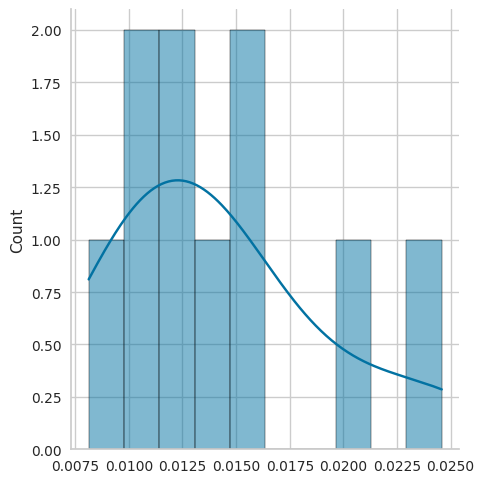

In [144]:
plt.figure(figsize=(16, 10))
sns.displot(-result, kde=True, bins=10)

In [127]:
np.exp(np.sqrt(np.mean(-result)))

1.1264118885523955

# Make Submission

In [145]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [146]:
test_ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [147]:
predictions = np.exp(baseline_model.predict(test_final))

In [148]:
submissions = pd.concat([test_ids, pd.Series(predictions, name='SalePrice')], axis=1)

In [149]:
submissions

,Id,SalePrice
0,1461,124111.290959
1,1462,158948.924566
2,1463,184458.095264
3,1464,192358.430543
4,1465,186598.083406
...,...,...
1454,2915,78888.733079
1455,2916,79816.090939
1456,2917,160598.084631
1457,2918,112298.111702


In [150]:
submissions.to_csv('./submission.csv', index=False, header=True)

# Bagging Ensemble

catboost CatBoost Regressor

br Bayesian Ridge

gbr Gradient Boosting Regressor

omp Orthogonal Matching Pursuit

ridge Ridge Regression

lightgbm Light Gradient Boosting Machine

In [151]:
models = {
    "catboost": CatBoostRegressor(verbose=0),
    "br": BayesianRidge(),
    "gbr": GradientBoostingRegressor(),
    "omp": OrthogonalMatchingPursuit(),
    "ridge": Ridge(),
    "lightgbm": GradientBoostingRegressor()
}

In [152]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.682938,-0.435439,1.046258,0.896833,1.230508,0.783229,-0.366734,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,0.038652,1.906370,0.154764,-0.395604,-0.817807,0.892444,-0.366734,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.682938,-0.435439,0.980221,0.848965,1.196387,0.658154,-0.366734,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.682938,-0.435439,-1.859351,-0.682812,-0.817807,0.386923,-0.366734,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.251239,-0.435439,0.947203,0.753229,1.328520,0.758108,-0.366734,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,0.038652,-0.435439,0.914184,0.753229,-0.817807,-1.418196,-0.366734,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,0.038652,0.454875,0.220801,0.178812,1.138918,0.820898,2.567250,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.682938,2.514892,-1.000876,1.040437,-0.817807,0.467619,-0.366734,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.705122,0.454875,-0.703711,0.561757,-0.817807,-0.105594,2.994477,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [153]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [154]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

catboost trained.
br trained.
gbr trained.
omp trained.
ridge trained.
lightgbm trained.


In [155]:
results = {}
kf = KFold(n_splits=10)

for name, model in models.items():
    result=np.exp(np.sqrt(-cross_val_score(model, train_final, log_target,scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [156]:
results

{'catboost': array([1.11760662, 1.09434939, 1.11420913, 1.16974478, 1.15162198,
        1.10663181, 1.12539565, 1.10535981, 1.13015095, 1.13382518]),
 'br': array([1.12575623, 1.10831987, 1.12935107, 1.16942044, 1.15130563,
        1.14768594, 1.12970669, 1.10484037, 1.19384846, 1.13845951]),
 'gbr': array([1.1309968 , 1.10858422, 1.12432584, 1.17432207, 1.17061645,
        1.10405116, 1.13041138, 1.10634219, 1.13784128, 1.14999988]),
 'omp': array([1.1299455 , 1.1036237 , 1.12704276, 1.18309615, 1.15394209,
        1.16456749, 1.12766153, 1.12424061, 1.17251261, 1.15180133]),
 'ridge': array([1.13454804, 1.11100067, 1.12970869, 1.18049494, 1.15785614,
        1.16769787, 1.137311  , 1.10421047, 1.21377834, 1.13617443]),
 'lightgbm': array([1.12996621, 1.10774629, 1.12354663, 1.17150929, 1.17134655,
        1.10470565, 1.13397942, 1.10681067, 1.13317675, 1.14964536])}

<Figure size 1600x1000 with 0 Axes>

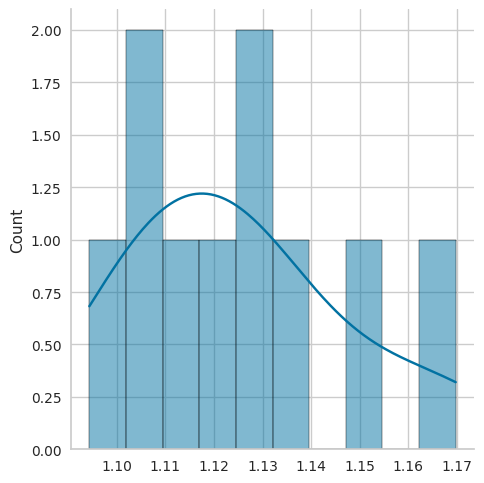

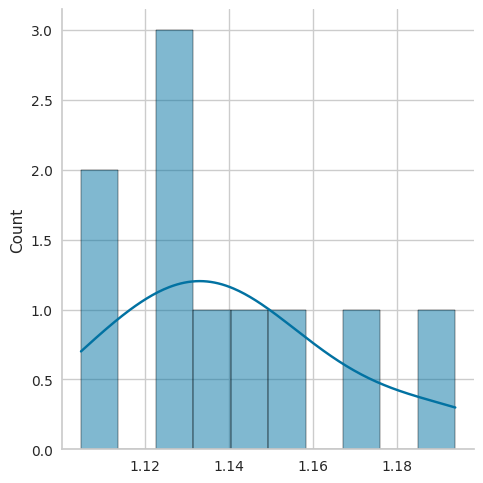

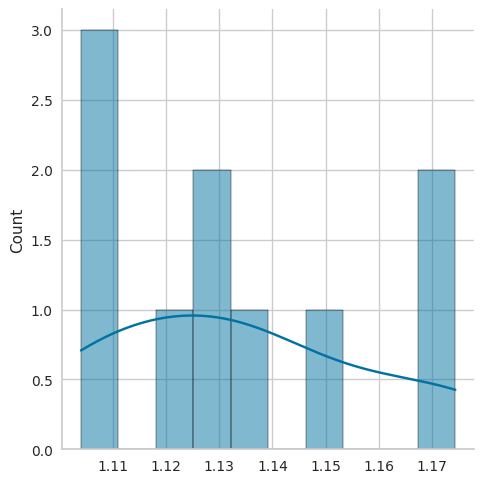

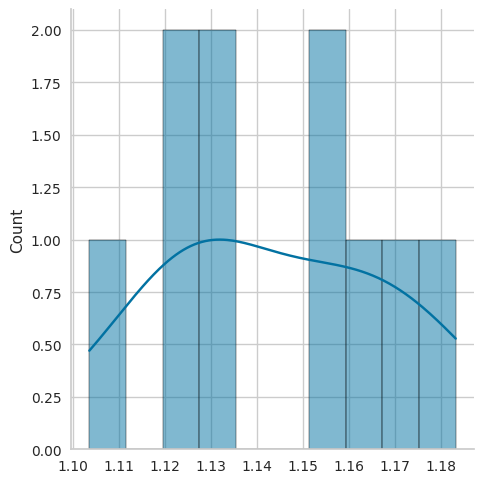

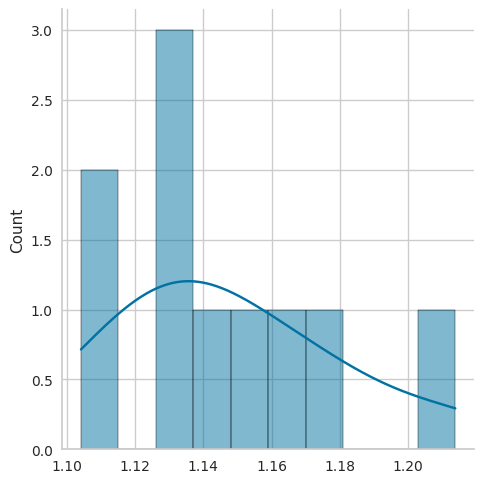

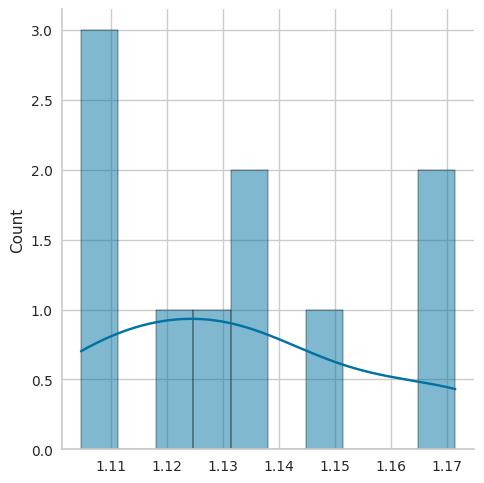

In [157]:
plt.figure(figsize=(16, 10))

for name, model in models.items():
    sns.displot(results[name], kde=True, bins=10)
plt.show()

In [158]:
for name, result in results.items():
    print(name + "\n-------------\n")
    print(np.mean(result))
    print(np.std(result))

catboost
-------------

1.1248895308912499
0.021561464384983874
br
-------------

1.1398694219967125
0.025722325200966498
gbr
-------------

1.1337491276248328
0.02379094655668405
omp
-------------

1.1438433771665113
0.02386768028165454
ridge
-------------

1.1472780579966095
0.031494043616273865
lightgbm
-------------

1.1332432800830043
0.023353075452492836


# Combine Prediction

In [159]:
test_final.set_index('index', inplace=True)

In [160]:
final_predictions  = (
    0.1 * np.exp(models['catboost'].predict(test_final)) +
   0.2 * np.exp(models['br'].predict(test_final)) +
    0.2 * np.exp(models['gbr'].predict(test_final)) +
    0.2 * np.exp(models['omp'].predict(test_final)) +
    0.2 * np.exp(models['ridge'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) 
)

final_predictions

array([121306.7030152 , 160275.05514303, 182230.08722819, ...,
       166064.6345738 , 118133.12717045, 225972.557532  ])

In [161]:
submissions = pd.concat([test_ids, pd.Series(final_predictions, name='SalePrice')], axis=1)

In [162]:
submissions

,Id,SalePrice
0,1461,121306.703015
1,1462,160275.055143
2,1463,182230.087228
3,1464,194155.983173
4,1465,198367.503053
...,...,...
1454,2915,81243.705426
1455,2916,81485.961547
1456,2917,166064.634574
1457,2918,118133.127170


In [163]:
submissions.to_csv('./02_submission.csv', index=False, header=True)

# Hyperparameter optimization

In [164]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}


In [165]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "br": BayesianRidge(**br_params),
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "ridge": Ridge(**ridge_params),
    "omp": OrthogonalMatchingPursuit()
}

In [166]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

catboost trained.
br trained.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4314
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 215
[LightGBM] [Info] Start training from score 12.024051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [167]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4198
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 210
[LightGBM] [Info] Start training from score 12.026856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [168]:
results

{'catboost': array([1.12115686, 1.0962473 , 1.10941734, 1.16440022, 1.15385853,
        1.10603072, 1.12544456, 1.10306372, 1.13290718, 1.13673679]),
 'br': array([1.12353482, 1.10737612, 1.12864848, 1.16926135, 1.15378709,
        1.13380731, 1.12762072, 1.10522361, 1.18330998, 1.13900714]),
 'lightgbm': array([1.13291777, 1.10248014, 1.1072552 , 1.16669139, 1.16568622,
        1.10780502, 1.13165042, 1.10756947, 1.15320393, 1.13883636]),
 'ridge': array([1.12480048, 1.10939274, 1.12961831, 1.17159495, 1.15909376,
        1.12727497, 1.12960075, 1.10755281, 1.17797025, 1.14108469]),
 'omp': array([1.1299455 , 1.1036237 , 1.12704276, 1.18309615, 1.15394209,
        1.16456749, 1.12766153, 1.12424061, 1.17251261, 1.15180133])}

In [169]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
catboost
1.1249263233469444
0.021239003241894195
----------
br
1.1371576612257104
0.023890440131845436
----------
lightgbm
1.131409592267493
0.023447920740697573
----------
ridge
1.137798370968557
0.023142510354701825
----------
omp
1.1438433771665113
0.02386768028165454


# Combine Predictions

In [170]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['br'].predict(test_final)) +
    0.2 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['ridge'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final))
)

In [171]:
final_predictions

array([121647.86069251, 159051.36205317, 181722.71342752, ...,
       164159.76174064, 116914.79521386, 223699.41580441])

# Make Submission

In [172]:
submission = pd.concat([test_ids, pd.Series(final_predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,121647.860693
1,1462,159051.362053
2,1463,181722.713428
3,1464,194677.507825
4,1465,193017.462598
...,...,...
1454,2915,80704.636860
1455,2916,81583.610090
1456,2917,164159.761741
1457,2918,116914.795214


In [173]:
submission.to_csv('./04_submission.csv', index=False, header=True)